In [1]:
import os
import pickle
import sys
sys.path.append("../../")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from notebooks.cra_tibetan_ml import load_tibetan_filenames, load_cra_filenames

In [2]:
def plot_corr(df, columns, save=None):
    corr_matrix = df[columns].corr()
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

    plt.figure(figsize=(15, 12))
    sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='Blues', fmt='.2f', linewidths=1, square=True,
                annot_kws={"size": 9})
    plt.title('Correlation Matrix', fontsize=15)
    if save is None:
        plt.show()
    else:
        plt.tight_layout()
        plt.savefig(save)

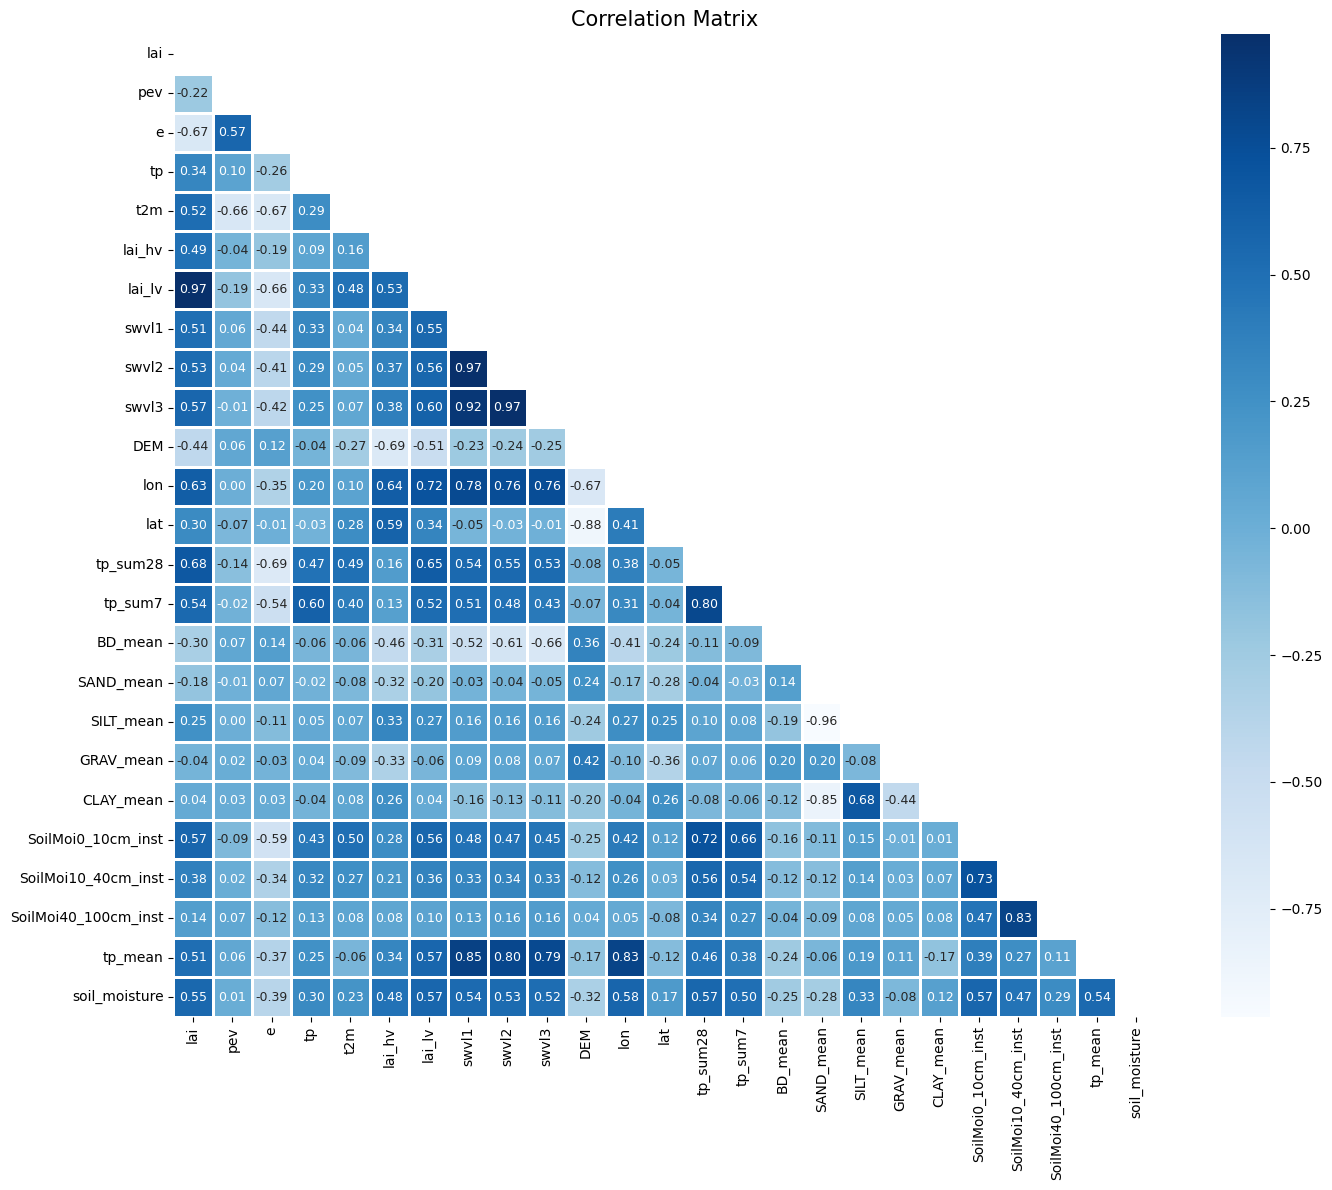

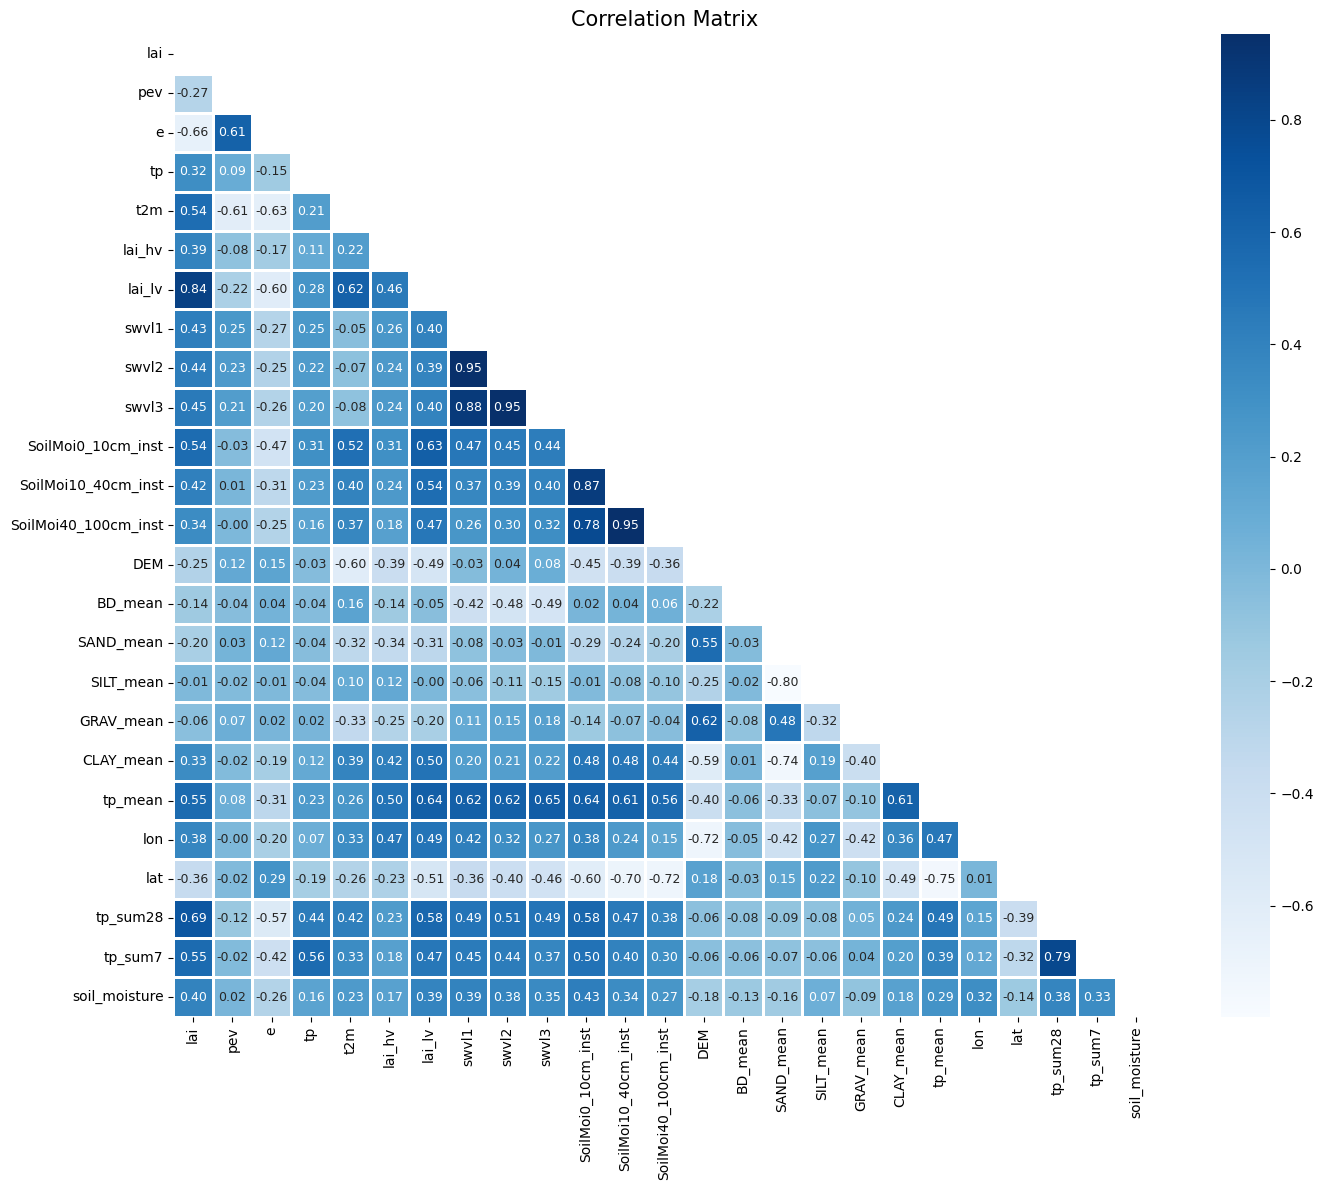

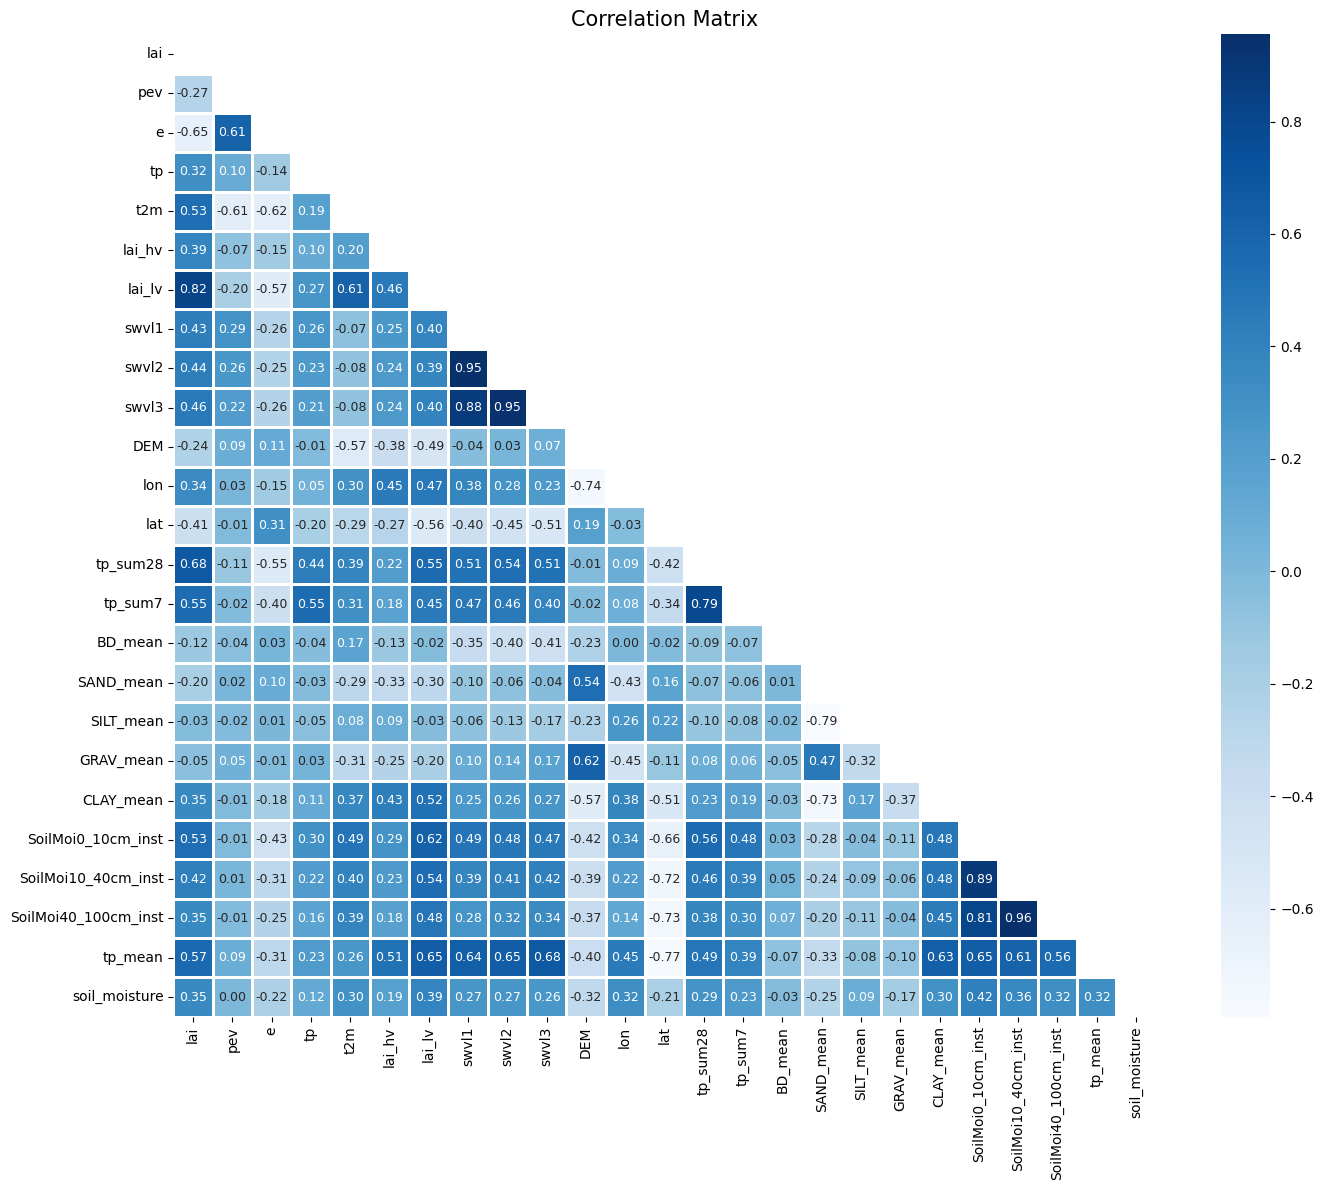

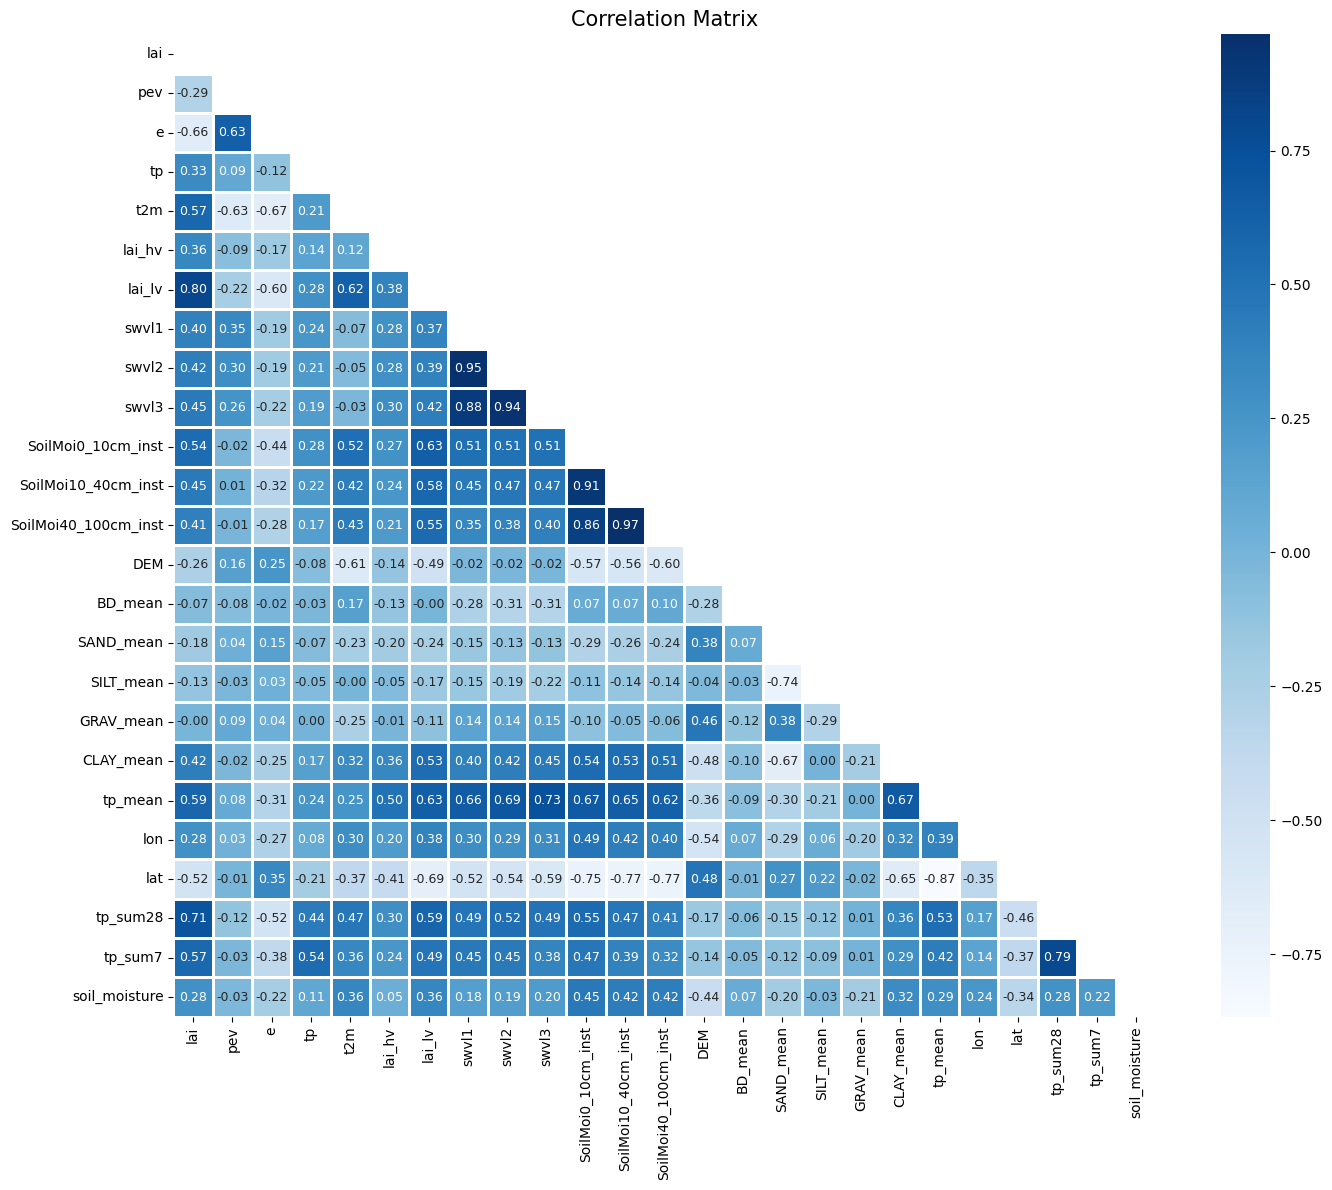

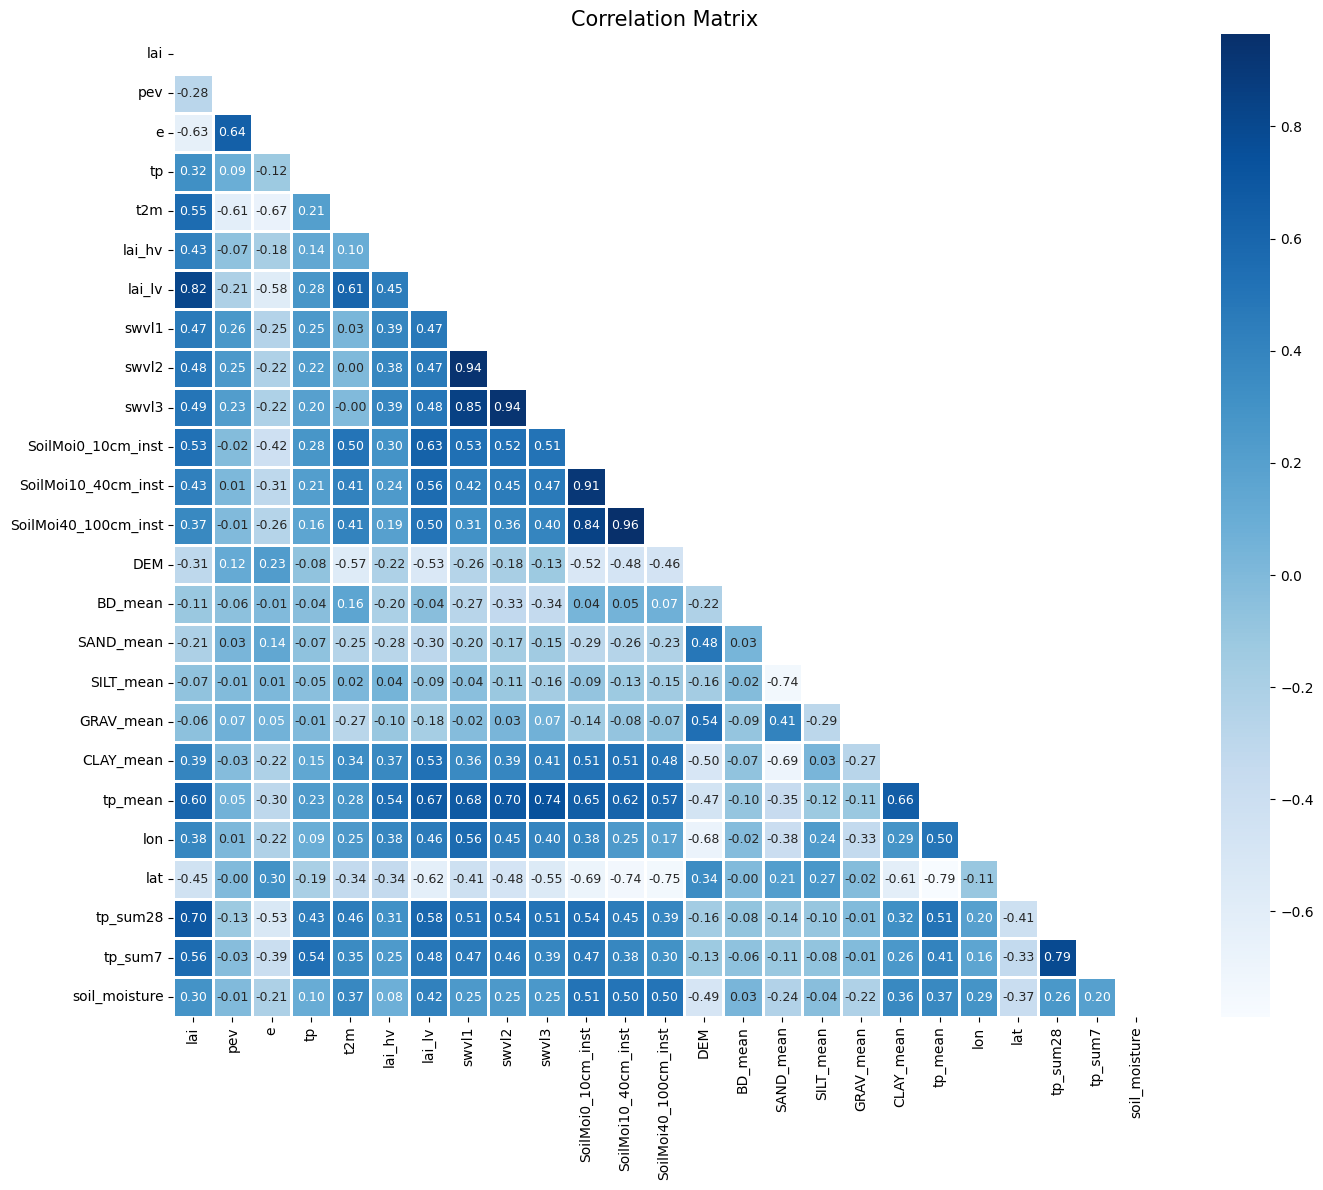

In [4]:
save_root = "../../data/plot/corr"
os.makedirs(save_root, exist_ok=True)

for l in range(1, 6):
    with open(f"../../checkpoints/AutoML_split_method_spatial_layer_layer{l}_iid_adversial_validation_time_budget_600/automl_total.pkl", "rb") as f:
        automl = pickle.load(f)

    with open(f"../../checkpoints/AutoML_split_method_spatial_layer_layer{l}_iid_adversial_validation_time_budget_360/feature_names.pkl", "rb") as f:
        feature_names = pickle.load(f)

    tibetan_filenames = load_tibetan_filenames("../../data/processed/Tibetan/structured_dataset_v5/", f"layer{l}")
    cra_filenames = load_cra_filenames("../../data/processed/CRA/structured_dataset/", f"layer{l}")

    filenames = tibetan_filenames + cra_filenames

    data = pd.concat([pd.read_csv(x) for x in filenames], axis=0, ignore_index=True)
    data["month"] = pd.DatetimeIndex(data["date_time"]).month
    data.drop(["date_time", "LAND_COVER"], axis=1, inplace=True)
    data = pd.get_dummies(data, columns=['month'], dtype=int)

    X = data[feature_names]
    y = data["soil_moisture"]

    plot_corr(data, [x for x in feature_names if not x.startswith("month")] + ["soil_moisture"], os.path.join(save_root, f"layer{l}.pdf"))

layer1: high corr: lai_lv, lai, swvl2, swvl1, swvl3, SILT_mean, SAND_mean  
layer2: high corr: swvl2, swvl1, swvl3, SoilMoi40_100cm_inst, SoilMoi10_40cm_inst  
layer3: high corr: swvl2, swvl1, swvl3, SoilMoi10_40cm_inst, SoilMoi40_100cm_inst  
layer4: high corr: swvl2, swvl1, swvl3, SoilMoi10_40cm_inst, SoilMoi40_100cm_inst, SoilMoi0_10cm_inst  
layer5: high corr: swvl2, swvl1, swvl3, SoilMoi10_40cm_inst, SoilMoi40_100cm_inst, SoilMoi0_10cm_inst  